In [1]:
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
log_path = Path("/home/kafka/repos/thesis/logs_2/")

# Single training
train_single_18 = log_path / "single_runs"
train_single_34 = log_path / "single_runs"

# Multiple training 50-50
train_mul_18 = log_path / "queues"
train_mul_34 = log_path / "queues"


In [3]:
# BASELINE

# 1x RN18, single training instances, BS 50, 1840 MB
df_18_bs50 = pd.read_csv(train_single_18 / "resnet18_bs50" / "resnet18_pretrained_pid_9590.csv")

# 2x RN18, single training instances, BS 50, 3680 MB
df_18_bs50_2x = pd.read_csv(train_single_18 / "resnet18_bs50" / "resnet18_pretrained_pid_8623.csv")

# 3x RN18, single training instances, BS 50, 5520 MB
df_18_bs50_3x = pd.read_csv(train_single_18 / "resnet18_bs50" / "resnet18_pretrained_pid_6340.csv")

# 4x RN18, single training instances, BS 50, 7360 MB
df_18_bs50_4x = pd.read_csv(train_single_18 / "resnet18_bs50" / "resnet18_pretrained_pid_10272.csv")


# BASELINE + MPS

# 1x RN18, single training instances, BS 50, 3680 MB
df_18_bs50_1x_mps = pd.read_csv(train_single_18 / "resnet18_bs50" / "resnet18_pretrained_pid_16093.csv")

# 2x RN18, single training instances, BS 50, 3680 MB
df_18_bs50_2x_mps = pd.read_csv(train_single_18 / "resnet18_bs50" / "resnet18_pretrained_pid_10197.csv")

# 3x RN18, single training instances, BS 50, 5520 MB
df_18_bs50_3x_mps = pd.read_csv(train_single_18 / "resnet18_bs50" / "resnet18_pretrained_pid_11186.csv")

# 4x RN18, single training instances, BS 50, 7360 MB
df_18_bs50_4x_mps = pd.read_csv(train_single_18 / "resnet18_bs50" / "resnet18_pretrained_pid_12659.csv")


# SHARED DATA

# 1x RN18, shared data, BS 50, q=1, 1828 MB
df_mul_18_bs50_1x = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs50_8tw_2vw_1pf_pid_8399.csv")

# 2x RN18, shared data, BS 50, q=1, 3376 MB
df_mul_18_bs50_2x = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs50_8tw_2vw_1pf_pid_8125.csv")

# 3x RN18, shared data, BS 50, q=1, 4924 MB
df_mul_18_bs50_3x = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs50_8tw_2vw_1pf_pid_7822.csv")

# 4x RN18, shared data, BS 50, q=1, 6502 MB
df_mul_18_bs50_4x = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs50_8tw_2vw_1pf_pid_7241.csv")

# 4x RN18, shared data, BS 60, q=1, 7822 MB
df_mul_18_bs60_4x = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs60_8tw_2vw_1pf_pid_13810.csv")

# 5x RN18, shared data, BS 50, q=1, 7965 MB
df_mul_18_bs50_5x = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs50_8tw_2vw_1pf_pid_6097.csv")


# SHARED DATA + MPS

# 1x RN18, shared data, BS 50, q=1, 6502 MB
df_mul_18_bs50_1x_mps = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs50_8tw_2vw_1pf_pid_16641.csv")

# 2x RN18, shared data, BS 50, q=1, 6502 MB
df_mul_18_bs50_2x_mps = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs50_8tw_2vw_1pf_pid_15788.csv")

# 3x RN18, shared data, BS 50, q=1, 6502 MB
df_mul_18_bs50_3x_mps = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs50_8tw_2vw_1pf_pid_15447.csv")

# 4x RN18, shared data, BS 50, q=1, 6502 MB
df_mul_18_bs50_4x_mps = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs50_8tw_2vw_1pf_pid_15077.csv")

In [4]:
dfs = [
    # RN18 single
    df_18_bs50,
    df_18_bs50_2x, 
    df_18_bs50_3x,
    df_18_bs50_4x,

    # RN18 single MPS
    df_18_bs50_1x_mps,
    df_18_bs50_2x_mps,
    df_18_bs50_3x_mps,
    df_18_bs50_4x_mps,

    # RN18 shared
    df_mul_18_bs50_1x,
    df_mul_18_bs50_2x,
    df_mul_18_bs50_3x,
    df_mul_18_bs50_4x,
    df_mul_18_bs60_4x,
    df_mul_18_bs50_5x,

    # RN18 shared MPS
    df_mul_18_bs50_1x_mps,
    df_mul_18_bs50_2x_mps,
    df_mul_18_bs50_3x_mps,
    df_mul_18_bs50_4x_mps,

    # 2x RN18, RN34 eval - single, shared, shared + MPS
    #df_18_bs50_2_1,
    #df_34_bs50_2_3,
    #df_mul_18_bs50_2_1,
    #df_mul_34_bs50_2_3,
    #df_mul_18_bs50_mps_2_1,
    #df_mul_34_bs50_mps_2_3,
]

for df in dfs:
    try:
        df.loc[-1] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    except:
        df.loc[-1] = [0, 0, 0, 0, 0, 0, 0, 0, 0]
    df.index = df.index + 1
    df.sort_index(inplace=True)
    df["acc_time"] = df["total_time"].cumsum()

In [5]:
sequential_total_time = df_18_bs50.iloc[10]["acc_time"]
sequential_total_time_2x = sequential_total_time*2
sequential_total_time_3x = sequential_total_time*3
sequential_total_time_4x = sequential_total_time*4
sequential_total_time_5x = sequential_total_time*5

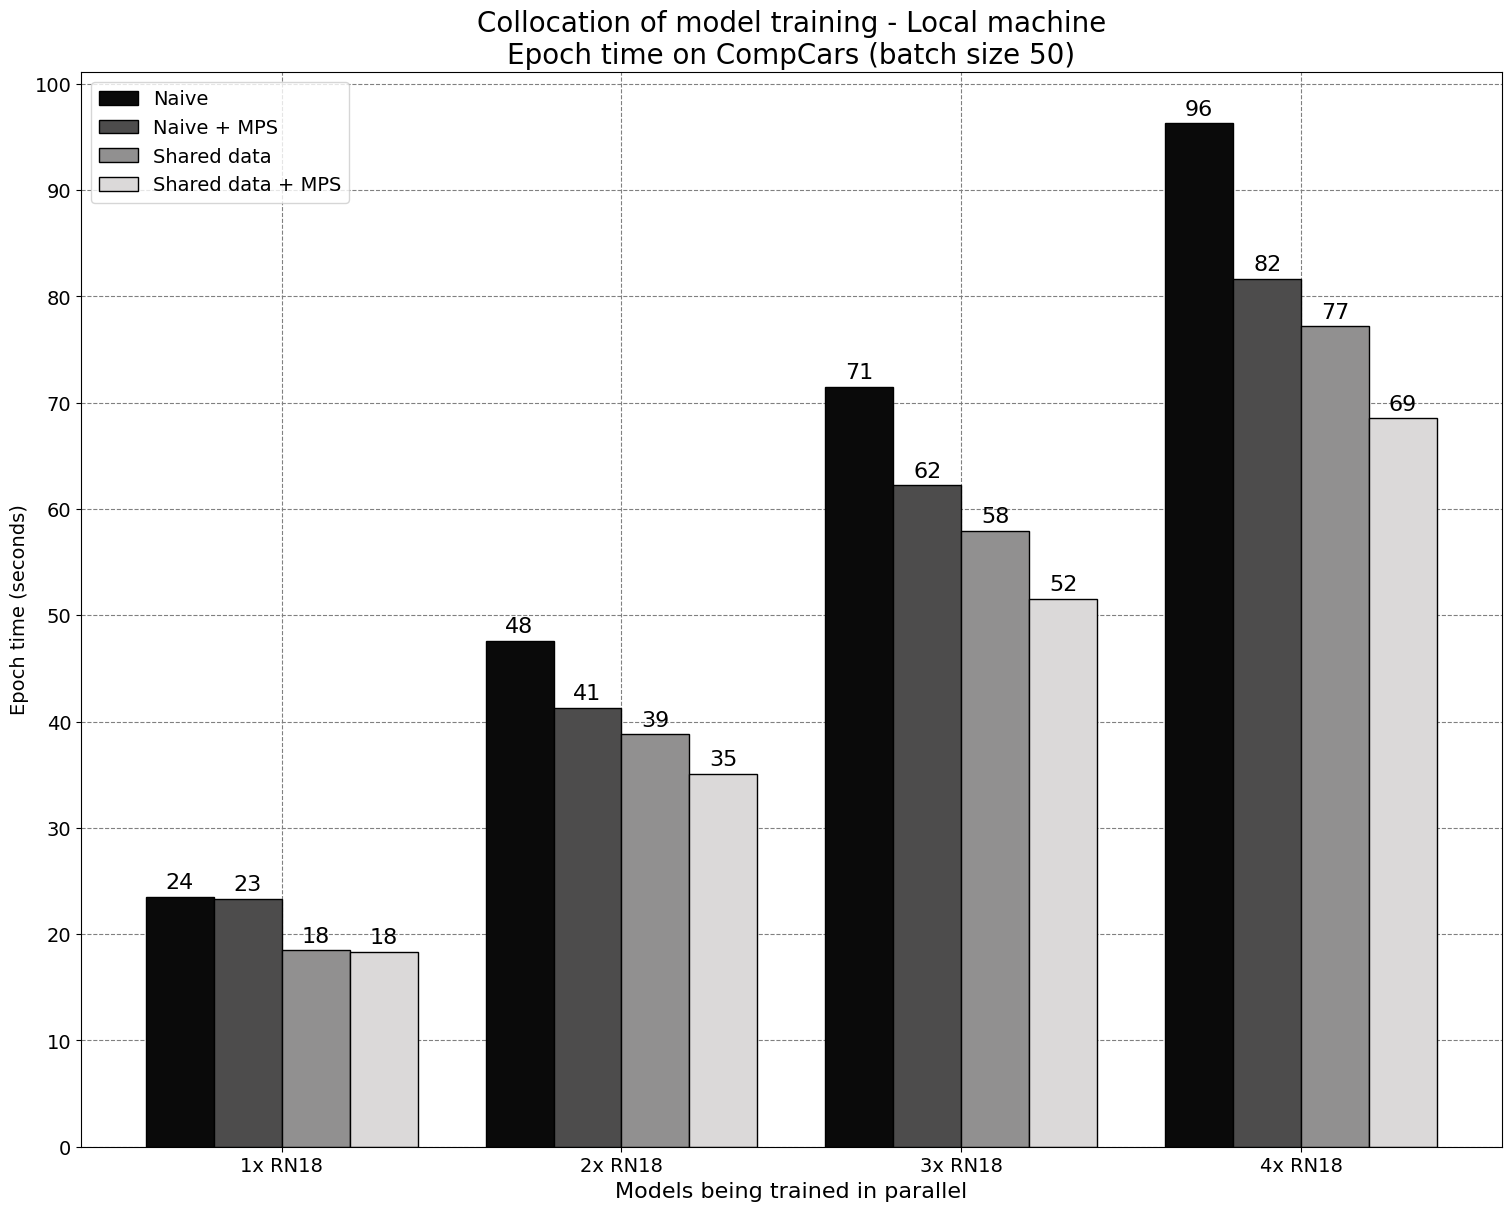

In [12]:
import matplotlib.pyplot as plt
import numpy as np

workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18")
#measurements ={
#    "Naive": (df_18_bs50.iloc[10]["acc_time"], df_18_bs50_2x.iloc[10]["acc_time"], df_18_bs50_3x.iloc[10]["acc_time"], df_18_bs50_4x.iloc[10]["acc_time"]),
#    "Naive + MPS": (df_18_bs50_1x_mps.iloc[10]["acc_time"], df_18_bs50_2x_mps.iloc[10]["acc_time"], df_18_bs50_3x_mps.iloc[10]["acc_time"], df_18_bs50_4x_mps.iloc[10]["acc_time"]),
#    "Shared data": (df_mul_18_bs50_1x.iloc[10]["acc_time"], df_mul_18_bs50_2x.iloc[10]["acc_time"], df_mul_18_bs50_3x.iloc[10]["acc_time"], df_mul_18_bs50_4x.iloc[10]["acc_time"]),
#    "Shared data + MPS": (df_mul_18_bs50_1x_mps.iloc[10]["acc_time"], df_mul_18_bs50_2x_mps.iloc[10]["acc_time"], df_mul_18_bs50_3x_mps.iloc[10]["acc_time"], df_mul_18_bs50_4x_mps.iloc[10]["acc_time"]),
#}

measurements ={
    "Naive": (df_18_bs50.iloc[10]["train_time"], df_18_bs50_2x.iloc[10]["train_time"], df_18_bs50_3x.iloc[10]["train_time"], df_18_bs50_4x.iloc[10]["train_time"]),
    "Naive + MPS": (df_18_bs50_1x_mps.iloc[10]["train_time"], df_18_bs50_2x_mps.iloc[10]["train_time"], df_18_bs50_3x_mps.iloc[10]["train_time"], df_18_bs50_4x_mps.iloc[10]["train_time"]),
    "Shared data": (df_mul_18_bs50_1x.iloc[10]["train_time"], df_mul_18_bs50_2x.iloc[10]["train_time"], df_mul_18_bs50_3x.iloc[10]["train_time"], df_mul_18_bs50_4x.iloc[10]["train_time"]),
    "Shared data + MPS": (df_mul_18_bs50_1x_mps.iloc[10]["train_time"], df_mul_18_bs50_2x_mps.iloc[10]["train_time"], df_mul_18_bs50_3x_mps.iloc[10]["train_time"], df_mul_18_bs50_4x_mps.iloc[10]["train_time"]),
}


x = np.arange(len(workloads))  # the label locations
width = 0.2  # the width of the bars
multiplier = -0.5

fig, ax = plt.subplots(layout='constrained', figsize=(15,12))
hatches = ["\\", "-", "//", "o"]
shades = ["#0a0a0a", "#4d4c4c", "#919090", "#dbd9d9"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    #rects = ax.bar(x + offset, measurement, width, label=attribute, fill=False, hatch=hatches[idx])
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black")
    #ax.bar_label(rects, padding=3, fontsize=18)
    ax.bar_label(rects, padding=3, fmt='{:.0f}', label_type="edge", color="black", size=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Epoch time (seconds)', fontsize=14)
ax.set_title('Collocation of model training - Local machine\nEpoch time on CompCars (batch size 50)', fontsize=20)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 101, 10)], fontsize=14)
plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()

/tmp/ipykernel_10115/1041266085.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  ax.plot(sequential_total_time, 9.95, "or", c="grey", label="1x RN18, BS 50, sequential total time")
/tmp/ipykernel_10115/1041266085.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  ax.plot(sequential_total_time_2x, 9.95, "or", c="red", label="2x RN18, BS 50, sequential total time")
/tmp/ipykernel_10115/1041266085.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "or" (-> color='r'). The keyword argument will take precedence.
  ax.plot(sequential_total_time_3x, 9.95, "or", c="blue", label="3x RN18, BS 50, sequential total time")
/tmp/ipykernel_10115/1041266085.py:5: UserWarning: color is redundantly defined by the 'color' keyword a

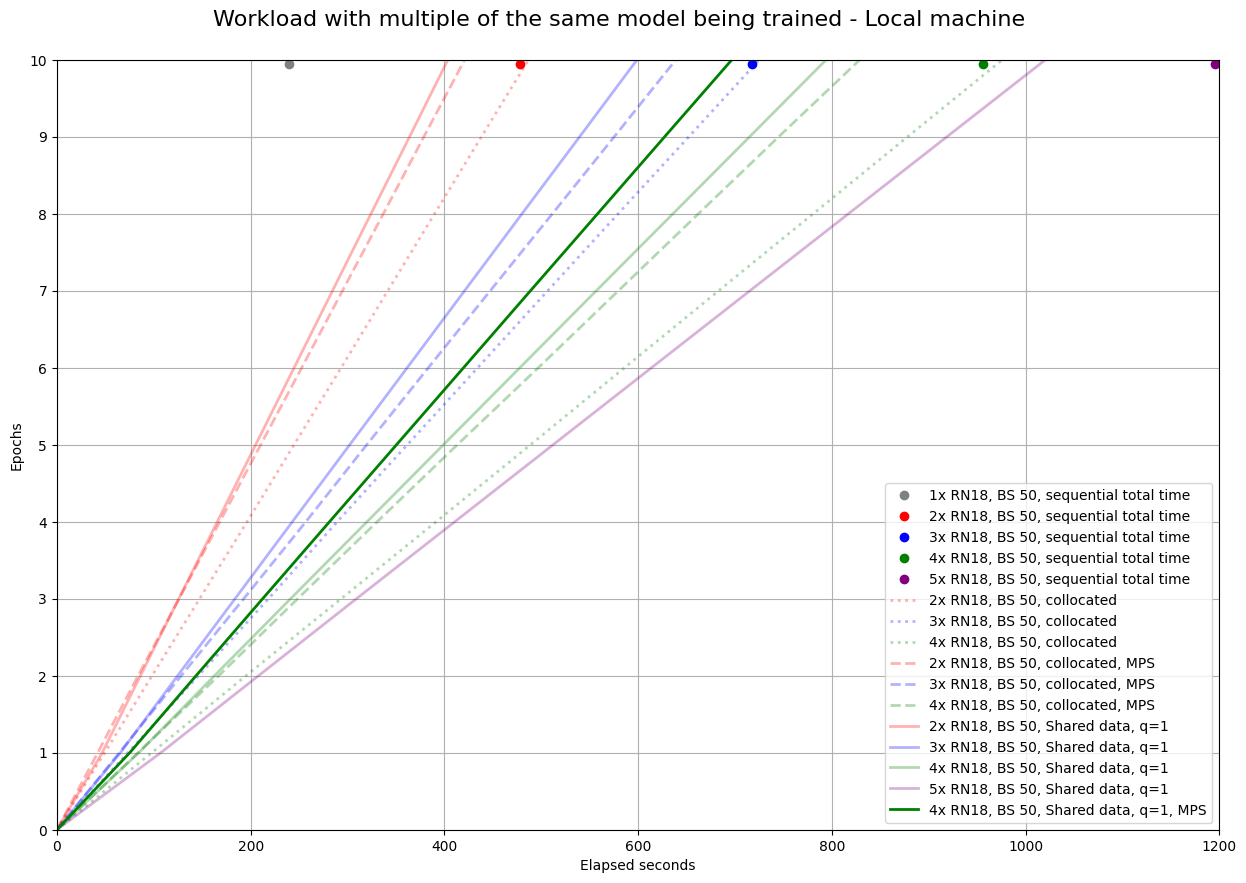

In [41]:
fig, ax = plt.subplots(figsize=(15,10))
ax.plot(sequential_total_time, 9.95, "or", c="grey", label="1x RN18, BS 50, sequential total time")
ax.plot(sequential_total_time_2x, 9.95, "or", c="red", label="2x RN18, BS 50, sequential total time")
ax.plot(sequential_total_time_3x, 9.95, "or", c="blue", label="3x RN18, BS 50, sequential total time")
ax.plot(sequential_total_time_4x, 9.95, "or", c="green", label="4x RN18, BS 50, sequential total time")
ax.plot(sequential_total_time_5x, 9.95, "or", c="purple", label="5x RN18, BS 50, sequential total time")

df_18_bs50_2x.plot(x="acc_time", y="epoch", ax=ax, label="2x RN18, BS 50, collocated", c="red", linestyle="dotted", linewidth=2, alpha=0.3)
df_18_bs50_3x.plot(x="acc_time", y="epoch", ax=ax, label="3x RN18, BS 50, collocated", c="blue", linestyle="dotted", linewidth=2, alpha=0.3)
df_18_bs50_4x.plot(x="acc_time", y="epoch", ax=ax, label="4x RN18, BS 50, collocated", c="green", linestyle="dotted", linewidth=2, alpha=0.3)

df_18_bs50_2x_mps.plot(x="acc_time", y="epoch", ax=ax, label="2x RN18, BS 50, collocated, MPS", c="red", linestyle="dashed", linewidth=2, alpha=0.3)
df_18_bs50_3x_mps.plot(x="acc_time", y="epoch", ax=ax, label="3x RN18, BS 50, collocated, MPS", c="blue", linestyle="dashed", linewidth=2, alpha=0.3)
df_18_bs50_4x_mps.plot(x="acc_time", y="epoch", ax=ax, label="4x RN18, BS 50, collocated, MPS", c="green", linestyle="dashed", linewidth=2, alpha=0.3)

#df_mul_18_bs50_1x.plot(x="acc_time", y="epoch", ax=ax, label="1x RN18, BS 50, Shared data, q=1", c="grey", linewidth=2, alpha=1)
df_mul_18_bs50_2x.plot(x="acc_time", y="epoch", ax=ax, label="2x RN18, BS 50, Shared data, q=1", c="red", linewidth=2, alpha=0.3)
#df_mul_18_bs80_2x_q20.plot(x="acc_time", y="epoch", ax=ax, label="2x RN18, BS 80, Shared data, q=20", c="red", linewidth=2, alpha=0.2)
df_mul_18_bs50_3x.plot(x="acc_time", y="epoch", ax=ax, label="3x RN18, BS 50, Shared data, q=1", c="blue", linewidth=2, alpha=0.3)
df_mul_18_bs50_4x.plot(x="acc_time", y="epoch", ax=ax, label="4x RN18, BS 50, Shared data, q=1", c="green", linewidth=2, alpha=0.3)
df_mul_18_bs50_5x.plot(x="acc_time", y="epoch", ax=ax, label="5x RN18, BS 50, Shared data, q=1", c="purple", linewidth=2, alpha=0.3)
#df_mul_18_bs60_4x.plot(x="acc_time", y="epoch", ax=ax, label="4x RN18, BS 60, Shared data, q=1", c="green", linewidth=3, alpha=1)

df_mul_18_bs50_4x_mps.plot(x="acc_time", y="epoch", ax=ax, label="4x RN18, BS 50, Shared data, q=1, MPS", c="green", linewidth=2, alpha=1)

# 4x RN18 colocated is fast at the end because VRAM OOM, leading to two training processes
# stopping after 9 epochs

plt.yticks([i for i in range(0, 11)])
plt.xlim((0,1200))
plt.ylim((0,10))
plt.legend(loc="lower right")
plt.ylabel("Epochs")    
plt.xlabel("Elapsed seconds")
plt.suptitle("Workload with multiple of the same model being trained - Local machine", y=0.93, fontsize=16)
#plt.title("Epoch numbers annotated", fontsize=10)
plt.grid()
plt.show()

In [7]:
# 1x RN18, single training instances, BS 50, 1840 MB
df_18_bs50_gpu_util = pd.read_csv(train_single_18 / "resnet18_bs50" / "resnet18_pretrained_pid_9590_gpu_util.csv")

# 2x RN18, single training instances, BS 50, 3680 MB
df_18_bs50_2x_gpu_util = pd.read_csv(train_single_18 / "resnet18_bs50" / "resnet18_pretrained_pid_8623_gpu_util.csv")

# 3x RN18, single training instances, BS 50, 5520 MB
df_18_bs50_3x_gpu_util = pd.read_csv(train_single_18 / "resnet18_bs50" / "resnet18_pretrained_pid_6340_gpu_util.csv")

# 4x RN18, single training instances, BS 50, 7360 MB
df_18_bs50_4x_gpu_util = pd.read_csv(train_single_18 / "resnet18_bs50" / "resnet18_pretrained_pid_10272_gpu_util.csv")

# 1x RN18, shared data, BS 50, q=1, 1828 MB
df_mul_18_bs50_1x_gpu_util = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs50_8tw_2vw_1pf_pid_8399_gpu_util.csv")

# 2x RN18, shared data, BS 50, q=1, 3376 MB
df_mul_18_bs50_2x_gpu_util = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs50_8tw_2vw_1pf_pid_8125_gpu_util.csv")

# 3x RN18, shared data, BS 50, q=1, 4924 MB
df_mul_18_bs50_3x_gpu_util = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs50_8tw_2vw_1pf_pid_7822_gpu_util.csv")

# 4x RN18, shared data, BS 50, q=1, 6502 MB
df_mul_18_bs50_4x_gpu_util = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs50_8tw_2vw_1pf_pid_7241_gpu_util.csv")

# 4x RN18, shared data, BS 60, q=1, 7822 MB
df_mul_18_bs60_4x_gpu_util = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs60_8tw_2vw_1pf_pid_13810_gpu_util.csv")

# 5x RN18, shared data, BS 50, q=1, 7965 MB
df_mul_18_bs50_5x_gpu_util = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs50_8tw_2vw_1pf_pid_6097_gpu_util.csv")


In [8]:
dfs_single = [
    # RN18 single
    df_18_bs50_gpu_util,
    df_18_bs50_2x_gpu_util, 
    df_18_bs50_3x_gpu_util,
    df_18_bs50_4x_gpu_util,
]

dfs_shared = [
    # RN18 shared
    df_mul_18_bs50_1x_gpu_util,
    df_mul_18_bs50_2x_gpu_util,
    df_mul_18_bs50_3x_gpu_util,
    df_mul_18_bs50_4x_gpu_util,
    df_mul_18_bs50_5x_gpu_util,
    #df_mul_18_bs60_4x,
]

lists_single, lists_shared = [], []

for idx, df in enumerate(dfs_single):
    rows, _ = df.shape
    mem = df.iloc[int(rows / 2): int((rows / 2) + 5)].drop_duplicates()[" used_gpu_memory [MiB]"].apply(lambda x: x.strip(" MiB")).astype(int).sum()
    lists_single.append((idx+1, mem))

for idx, df in enumerate(dfs_shared):
    rows, _ = df.shape
    mem = df.iloc[int(rows / 2): int((rows / 2) + 6)].drop_duplicates()[" used_gpu_memory [MiB]"].apply(lambda x: x.strip(" MiB")).astype(int).sum()
    lists_shared.append((idx+1, mem))

In [98]:
measurements

{'Naive': (239.11930513381958,
  486.9132330417633,
  724.978351354599,
  975.9649953842163),
 'Naive + MPS': (236.77656078338623,
  420.9404048919678,
  638.9533989429474,
  828.8583393096924),
 'Shared data': (197.70443511009216,
  403.6433300971985,
  598.8859691619873,
  794.126802444458),
 'Shared data + MPS': (196.86791849136353,
  363.36702585220337,
  526.4543881416321,
  696.7280507087708)}

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

workloads = ("1x RN18", "2x RN18", "3x RN18", "4x RN18")
measurements ={
    "Naive": (df_18_bs50.iloc[10]["acc_time"], df_18_bs50_2x.iloc[10]["acc_time"], df_18_bs50_3x.iloc[10]["acc_time"], df_18_bs50_4x.iloc[10]["acc_time"]),
    "Naive + MPS": (df_18_bs50_1x_mps.iloc[10]["acc_time"], df_18_bs50_2x_mps.iloc[10]["acc_time"], df_18_bs50_3x_mps.iloc[10]["acc_time"], df_18_bs50_4x_mps.iloc[10]["acc_time"]),
    "Shared data": (df_mul_18_bs50_1x.iloc[10]["acc_time"], df_mul_18_bs50_2x.iloc[10]["acc_time"], df_mul_18_bs50_3x.iloc[10]["acc_time"], df_mul_18_bs50_4x.iloc[10]["acc_time"]),
    "Shared data + MPS": (df_mul_18_bs50_1x_mps.iloc[10]["acc_time"], df_mul_18_bs50_2x_mps.iloc[10]["acc_time"], df_mul_18_bs50_3x_mps.iloc[10]["acc_time"], df_mul_18_bs50_4x_mps.iloc[10]["acc_time"]),
}


x = np.arange(len(workloads))  # the label locations
width = 0.2  # the width of the bars
multiplier = -0.5

fig, ax = plt.subplots(layout='constrained', figsize=(15,12))
hatches = ["\\", "-", "//", "o"]
shades = ["#0a0a0a", "#4d4c4c", "#919090", "#dbd9d9"]

for idx, (attribute, measurement) in enumerate(measurements.items()):
    offset = width * multiplier
    #rects = ax.bar(x + offset, measurement, width, label=attribute, fill=False, hatch=hatches[idx])
    rects = ax.bar(x + offset, measurement, width, label=attribute, color=shades[idx], edgecolor="black")
    #ax.bar_label(rects, padding=3, fontsize=18)
    ax.bar_label(rects, padding=3, fmt='{:.0f}', label_type="edge", color="black", size=16)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Elapsed time (seconds)', fontsize=14)
ax.set_title('Workload with multiple of the same model being trained - Local machine', fontsize=16)
ax.set_xticks(x + width, workloads, fontsize=14)
ax.legend(loc='upper left', fontsize=14)

ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
plt.yticks([i for i in range(0, 1001, 100)], fontsize=14)
plt.xlabel("Models being trained in parallel", fontsize=16)
plt.show()

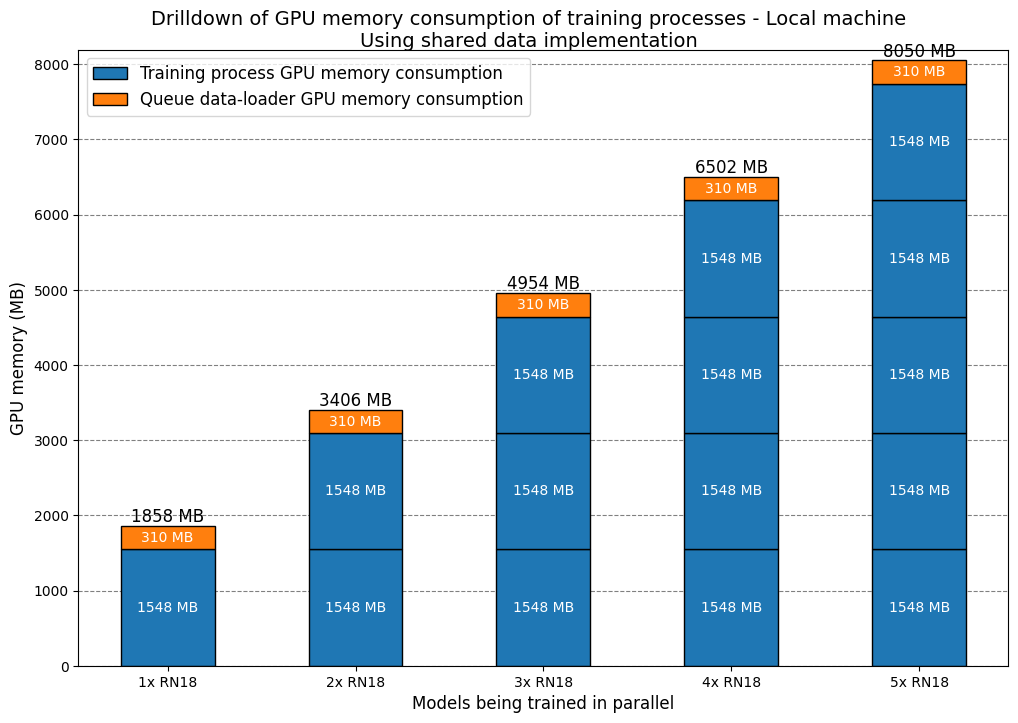

In [33]:
import numpy as np
fig, ax = plt.subplots(figsize=(12,8))
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
groups = ["1x RN18", "2x RN18", "3x RN18", "4x RN18", "5x RN18"]
values1 = [1548, 1548, 1548, 1548, 1548]
values2 = [310, 310, 310, 310, 310]

ind = np.arange(len(groups))  # the x locations for the groups
width = 0.5

# 2x, 3x, 4x RN18
for idx in ind:
    if idx == 0:
        bars = ax.bar(groups[idx:], values1[idx], width, edgecolor="black", color='#1f77b4', label="Training process GPU memory consumption")
    elif idx == 1:
        bars = ax.bar(groups[idx:], values1[idx:], width, edgecolor="black", color='#1f77b4', bottom=values1[idx-1])
    else:
        bars = ax.bar(groups[idx:], values1[idx:], width, edgecolor="black", color='#1f77b4', bottom=sum(values1[:idx]))
    ax.bar_label(bars, fmt='{:.0f} MB', label_type="center", color="white")

    label = "Queue data-loader GPU memory consumption" if idx == 0 else ""
    bars = ax.bar(groups[idx], values2[idx], width, edgecolor="black", bottom = sum(values1[:idx+1]), color="#ff7f0e", label = label)
    ax.bar_label(bars, fmt='{:.0f} MB', label_type="edge", color="black", size=12)
    ax.bar_label(bars, fmt='{:.0f} MB', label_type="center", color="white")

#plt.suptitle("Workload with multiple of the same model being trained - Local machine", y=0.93, fontsize=16)
plt.suptitle("Drilldown of GPU memory consumption of training processes - Local machine\nUsing shared data implementation", y=0.93, fontsize=14)
plt.ylabel("GPU memory (MB)", fontsize=12)
plt.xlabel("Models being trained in parallel", fontsize=12)
plt.legend(loc="upper left", fontsize=12)
plt.ylim((0, 8192))
plt.show()

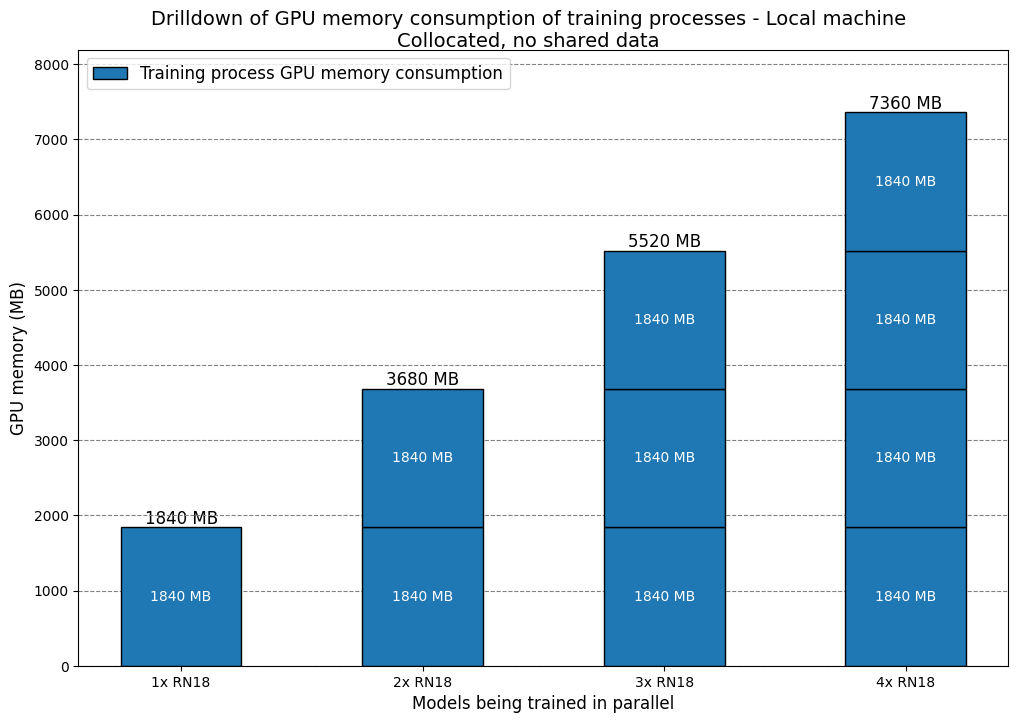

In [32]:
import numpy as np
fig, ax = plt.subplots(figsize=(12,8))
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
groups = ["1x RN18", "2x RN18", "3x RN18", "4x RN18"]
values1 = [1840, 1840, 1840, 1840]
values2 = [0, 0, 0, 0]

ind = np.arange(len(groups))  # the x locations for the groups
width = 0.5

# 2x, 3x, 4x RN18
for idx in ind:
    if idx == 0:
        bars = ax.bar(groups[idx:], values1[idx], width, edgecolor="black", color='#1f77b4', label="Training process GPU memory consumption")
    elif idx == 1:
        bars = ax.bar(groups[idx:], values1[idx:], width, edgecolor="black", color='#1f77b4', bottom=values1[idx-1])
    else:
        bars = ax.bar(groups[idx:], values1[idx:], width, edgecolor="black", color='#1f77b4', bottom=sum(values1[:idx]))
    ax.bar_label(bars, fmt='{:.0f} MB', label_type="edge", color="black", size=12, zorder=0)
    ax.bar_label(bars, fmt='{:.0f} MB', label_type="center", color="white")

plt.suptitle("Drilldown of GPU memory consumption of training processes - Local machine\nCollocated, no shared data", y=0.93, fontsize=14)
plt.ylabel("GPU memory (MB)", fontsize=12)
plt.xlabel("Models being trained in parallel", fontsize = 12)
plt.legend(loc="upper left", fontsize=12)
plt.ylim((0, 8192))
plt.show()

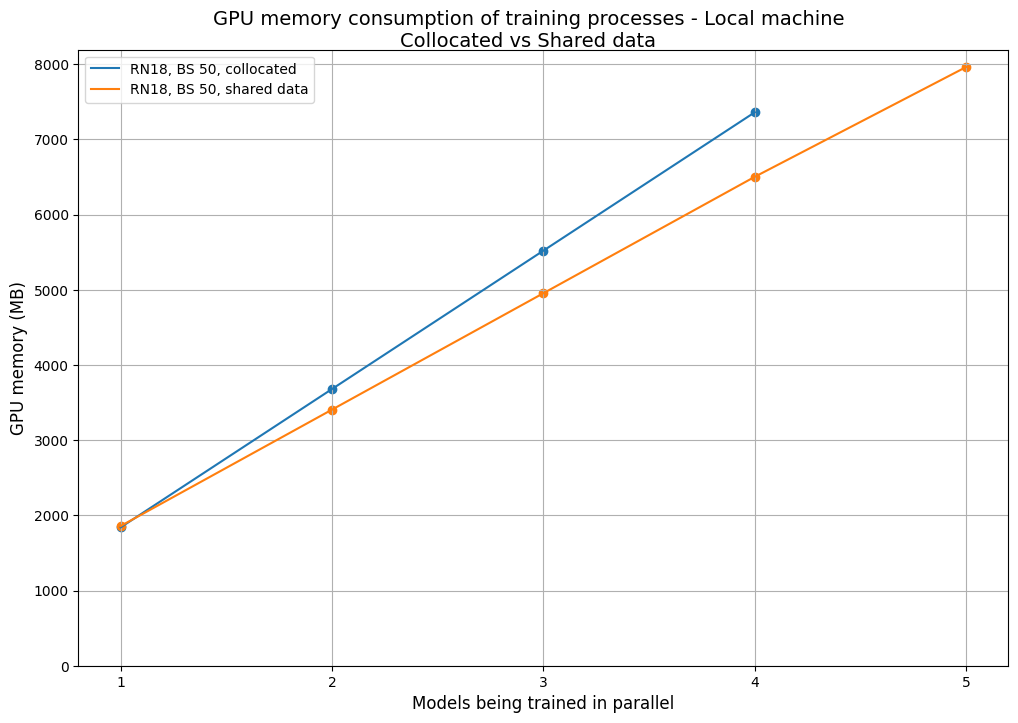

In [35]:
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(*zip(*lists_single), label="RN18, BS 50, collocated")
plt.scatter(*zip(*lists_single))

plt.plot(*zip(*lists_shared), label="RN18, BS 50, shared data")
plt.scatter(*zip(*lists_shared))

plt.ylabel("GPU memory (MB)", fontsize=12)
plt.xlabel("Models being trained in parallel", fontsize=12)
plt.xticks([i for i in range(1, 6)])
plt.ylim((0, 8192))
plt.legend()
plt.grid()
plt.suptitle("GPU memory consumption of training processes - Local machine\nCollocated vs Shared data", y=0.93, fontsize=14)
plt.show()

In [3]:
# 4x RN18, Single training instances, batch size 50 (1840MB x 4 = 7360 MB)
df_18_bs50_1 = pd.read_csv(train_single_18 / "resnet18_bs50" / "resnet18_pretrained_pid_51588.csv")
df_18_bs50_2 = pd.read_csv(train_single_18 / "resnet18_bs50" / "resnet18_pretrained_pid_51589.csv")
df_18_bs50_3 = pd.read_csv(train_single_18 / "resnet18_bs50" / "resnet18_pretrained_pid_51590.csv")
df_18_bs50_4 = pd.read_csv(train_single_18 / "resnet18_bs50" / "resnet18_pretrained_pid_51591.csv")

# 4x RN18, shared data, batch size 50 ( (1549MB x 4) + 310MB = 6506 MB)
df_mul_18_bs50_1 = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs50_8tw_4vw_1pf_pid_55139.csv")
df_mul_18_bs50_2 = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs50_8tw_4vw_1pf_pid_55140.csv")
df_mul_18_bs50_3 = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs50_8tw_4vw_1pf_pid_55141.csv")
df_mul_18_bs50_4 = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs50_8tw_4vw_1pf_pid_55152.csv")

# 3x RN18, Single training instances, batch size 80 (2428MB x 3 = 7284 MB)
df_18_bs80_1 = pd.read_csv(train_single_18 / "resnet18_bs80" / "resnet18_pretrained_pid_42063.csv")
df_18_bs80_2 = pd.read_csv(train_single_18 / "resnet18_bs80" / "resnet18_pretrained_pid_42064.csv")
df_18_bs80_3 = pd.read_csv(train_single_18 / "resnet18_bs80" / "resnet18_pretrained_pid_42065.csv")

# 3x RN18, shared data, batch size 80 ( (2158 + 2518 + 2336) + 374MB = 7386 MB)
df_mul_18_bs80_1 = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs80_8tw_4vw_1pf_pid_46151.csv")
df_mul_18_bs80_2 = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs80_8tw_4vw_1pf_pid_46152.csv")
df_mul_18_bs80_3 = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs80_8tw_4vw_1pf_pid_46153.csv")

# RN18, RN18, RN34, Single training instances, batch size 50 (1840 + 1840 + 2386 = 6066 MB)
df_18_bs50_2_1 = pd.read_csv(train_single_18 / "resnet18_bs50" / "resnet18_pretrained_pid_60870.csv")
df_18_bs50_2_2 = pd.read_csv(train_single_18 / "resnet18_bs50" / "resnet18_pretrained_pid_60869.csv")
df_34_bs50_2_3 = pd.read_csv(train_single_34 / "resnet34_bs50" / "resnet34_pretrained_pid_60871.csv")

# RN18, RN18, RN34, shared data, batch size 50 ( (1549 + 1549 + 2104) + 310 = 5512 MB)
df_mul_18_bs50_2_1 = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs50_8tw_4vw_1pf_pid_64431.csv")
df_mul_18_bs50_2_2 = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs50_8tw_4vw_1pf_pid_64432.csv")
df_mul_34_bs50_2_3 = pd.read_csv(train_mul_34 / "resnet34_pretrained_bs50_8tw_4vw_1pf_pid_64433.csv")

# RN18, RN18, RN34, shared data, MPS 29-29-41, batch size 50, + 42 seconds ( (1474 + 1474 + 2042) + 880 + 26 = 5896 MB)
df_mul_18_bs50_mps_2_1 = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs50_8tw_4vw_1pf_pid_74891.csv")
df_mul_18_bs50_mps_2_2 = pd.read_csv(train_mul_18 / "resnet18_pretrained_bs50_8tw_4vw_1pf_pid_74892.csv")
df_mul_34_bs50_mps_2_3 = pd.read_csv(train_mul_34 / "resnet34_pretrained_bs50_8tw_4vw_1pf_pid_74893.csv")

In [4]:
dfs = [
    # RN18 3x/4x eval
    df_18_bs50_1, 
    df_18_bs80_1,
    df_mul_18_bs50_1,
    df_mul_18_bs80_1,

    # 2x RN18, RN34 eval - single, shared, shared + MPS
    df_18_bs50_2_1,
    df_34_bs50_2_3,
    df_mul_18_bs50_2_1,
    df_mul_34_bs50_2_3,
    df_mul_18_bs50_mps_2_1,
    df_mul_34_bs50_mps_2_3,
]

for df in dfs:
    try:
        df.loc[-1] = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    except:
        df.loc[-1] = [0, 0, 0, 0, 0, 0, 0, 0, 0]
    df.index = df.index + 1
    df.sort_index(inplace=True)
    df["acc_time"] = df["total_time"].cumsum()

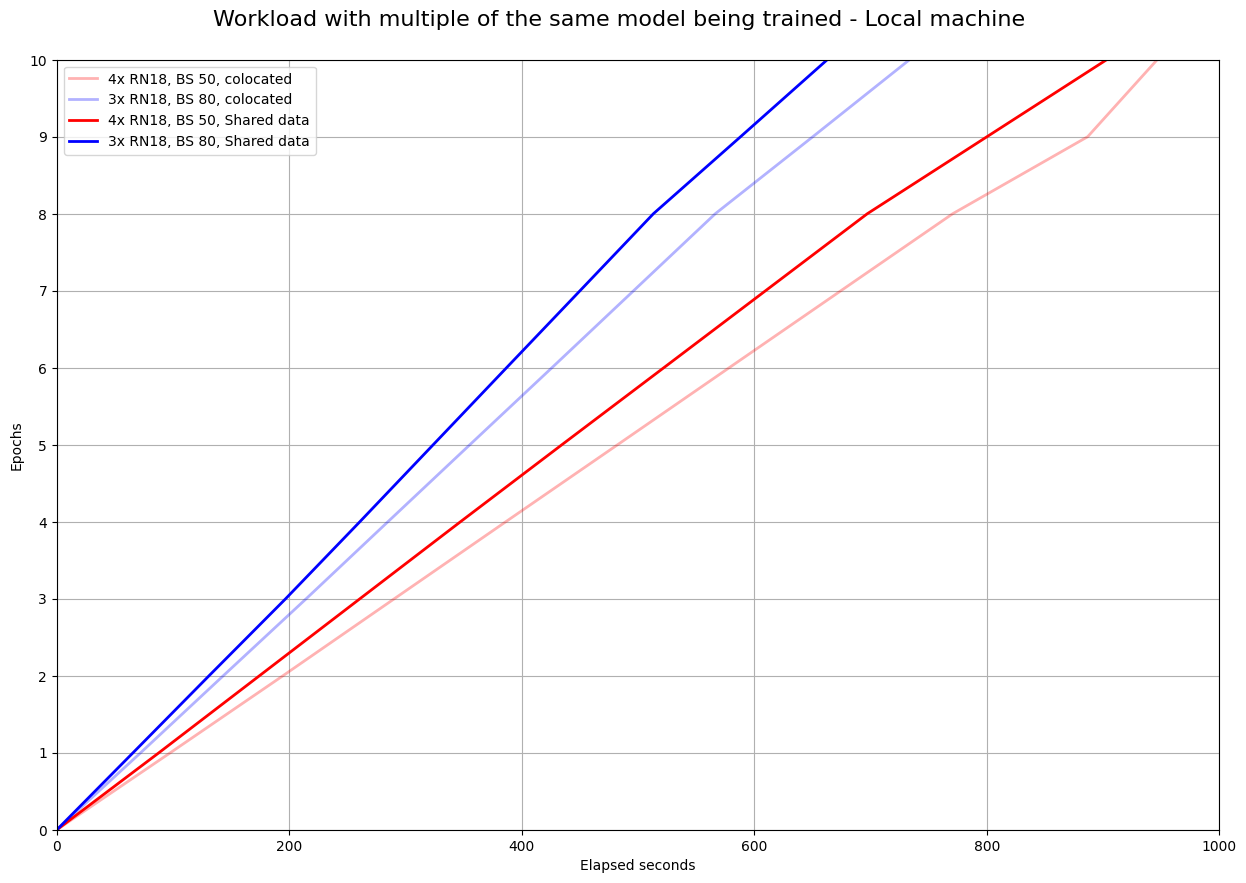

In [5]:
fig, ax = plt.subplots(figsize=(15,10))
df_18_bs50_1.plot(x="acc_time", y="epoch", ax=ax, label="4x RN18, BS 50, colocated", c="red", linewidth=2, alpha=0.3)
df_18_bs80_1.plot(x="acc_time", y="epoch", ax=ax, label="3x RN18, BS 80, colocated", c="blue", linewidth=2, alpha=0.3)

df_mul_18_bs50_1.plot(x="acc_time", y="epoch", ax=ax, label="4x RN18, BS 50, Shared data", c="red", linewidth=2, alpha=1)
df_mul_18_bs80_1.plot(x="acc_time", y="epoch", ax=ax, label="3x RN18, BS 80, Shared data", c="blue", linewidth=2, alpha=1)

# 4x RN18 colocated is fast at the end because VRAM OOM, leading to two training processes
# stopping after 9 epochs

plt.yticks([i for i in range(0, 11)])
plt.xlim((0,1000))
plt.ylim((0,10))
plt.legend(loc="upper left")
plt.ylabel("Epochs")    
plt.xlabel("Elapsed seconds")
plt.suptitle("Workload with multiple of the same model being trained - Local machine", y=0.93, fontsize=16)
#plt.title("Epoch numbers annotated", fontsize=10)
plt.grid()
plt.show()

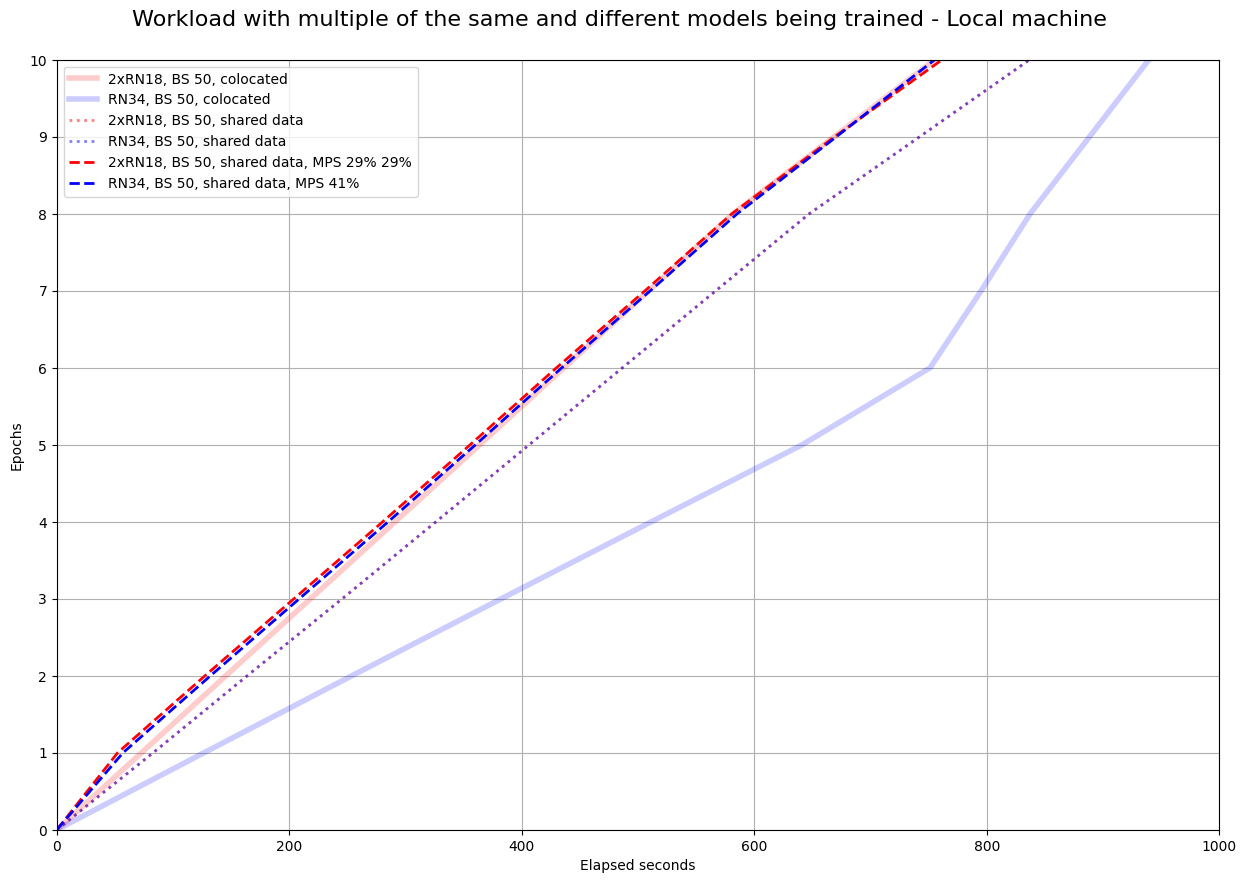

In [6]:
fig, ax = plt.subplots(figsize=(15,10))

df_18_bs50_2_1.plot(x="acc_time", y="epoch", ax=ax, label="2xRN18, BS 50, colocated", c="red", linewidth=4, alpha=0.2)
df_34_bs50_2_3.plot(x="acc_time", y="epoch", ax=ax, label="RN34, BS 50, colocated", c="blue", linewidth=4, alpha=0.2)

df_mul_18_bs50_2_1.plot(x="acc_time", y="epoch", ax=ax, label="2xRN18, BS 50, shared data", c="red", linewidth=2, linestyle="dotted", alpha=0.5)
df_mul_34_bs50_2_3.plot(x="acc_time", y="epoch", ax=ax, label="RN34, BS 50, shared data", c="blue", linewidth=2, linestyle="dotted", alpha=0.5)

df_mul_18_bs50_mps_2_1.plot(x="acc_time", y="epoch", ax=ax, label="2xRN18, BS 50, shared data, MPS 29% 29%", c="red", linewidth=2, linestyle="dashed", alpha=1)
df_mul_34_bs50_mps_2_3.plot(x="acc_time", y="epoch", ax=ax, label="RN34, BS 50, shared data, MPS 41%", c="blue", linestyle="dashed", linewidth=2, alpha=1)

plt.yticks([i for i in range(0, 11)])
plt.xlim((0,1000))
plt.ylim((0,10))
plt.legend(loc="upper left")
plt.ylabel("Epochs")    
plt.xlabel("Elapsed seconds")
plt.suptitle("Workload with multiple of the same and different models being trained - Local machine", y=0.93, fontsize=16)
#plt.title("Epoch numbers annotated", fontsize=10)
plt.grid()
plt.show()